In [1]:
from fastai.vision.all import *
from pathlib import Path
import torch

In [2]:
jets_source = Path('../images')

from fastai.vision.all import *
from pathlib import Path
files = get_image_files(jets_source)
len(files)

327

In [3]:
for item in files[300:321]:
    print(f"{item} - {'dir' if item.is_dir() else 'file'}")

../images/heat_scat_other/10.1007+s12031-023-02123-0_p9.png - file
../images/heat_scat_otherrg/10.1186+s40246-023-00526-z_p4.png - file
../images/heatrain/10.7554+elife-50571_p24.png - file
../images/heatrain/10.1016+j.jpha.2023.04.004_p8.png - file
../images/heatrain/10.1371+journal.pgen.1007135_p5.png - file
../images/heatrain/10.1371+journal.pgen.1007135_p7.png - file
../images/heatrain/10.1371+journal.pgen.1007135_p14.png - file
../images/heat_scatrg_other/10.3390+ijms241512455_p9.png - file
../images/imgovrain_other/10.1038+s41593-022-01140-3_p27.png - file
../images/heat_scat_scatrg/10.1038+s41590-020-00833-w_p26.png - file
../images/heatrg_scatrg/10.21037+tcr-22-2608_p9.png - file
../images/heatrg_scatrg/10.1038+s41420-023-01595-8_p8.png - file
../images/heatrg_scatrg/10.21037+tcr-22-2608_p8.png - file
../images/heat_scat/10.1186+s13045-022-01384-3_p10.png - file
../images/heat_scat/10.1186+s12890-023-02584-4_p9.png - file
../images/heat_scat/10.1038s+41590-023-01484-3_p27.png -

In [7]:
def get_multilabels_from_file(fname):
    return parent_label(fname).split('_')

# get_multilabels_from_file(f'{get_image_files(jets_source)}')

jets = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  splitter=RandomSplitter(valid_pct=0.2, seed=42), # have to implement a better train/valid split
                  get_items=get_image_files,
                  get_y=get_multilabels_from_file,
                  item_tfms=Resize(200))

In [8]:
dsets = jets.datasets(jets_source)
dsets.train[0]

(PILImage mode=RGB size=2481x3507,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

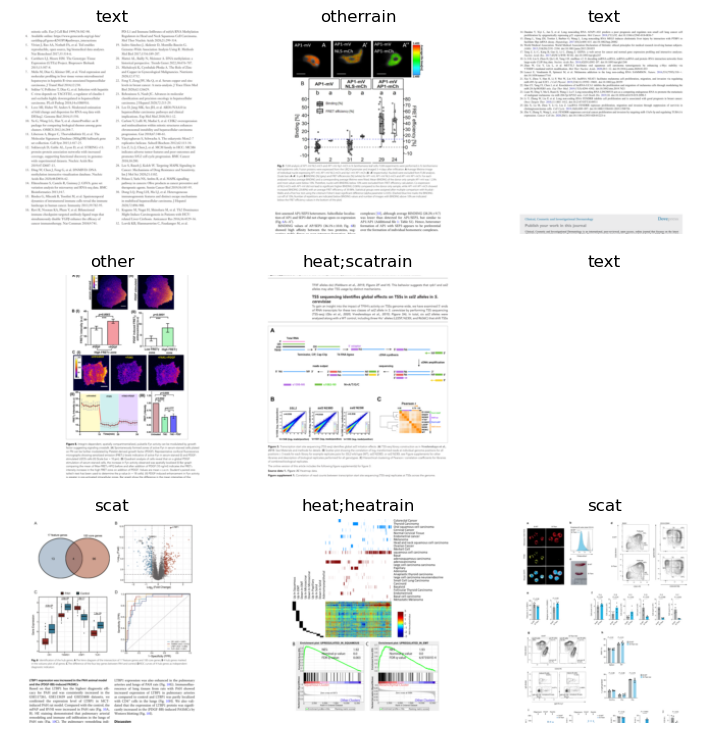

In [9]:
dls = jets.dataloaders(jets_source)
dls.show_batch()

Set up the model here

In [10]:
learn = vision_learner(dls, models.resnet50, pretrained=True, metrics=[accuracy_multi]) #remove warnings here by setting up cleanly

/home/vladi/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vladi/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
#learn.to(device='cuda')
print (torch.cuda.is_available)

<function is_available at 0x7f9c9e07fa30>


SuggestedLRs(valley=0.0010000000474974513)

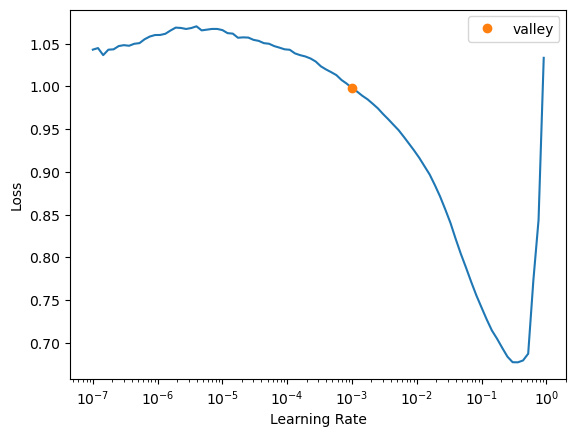

In [10]:
#learn.lr_find()

In [12]:
learn.fine_tune(15, 0.2) # enter learning rate from previous step here 0.2 for 400x (0.95 acc in 15 epochs) 0.2 also for 200x

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.340114,20.096754,0.459172,00:34


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.554724,15.254930,0.560947,00:32
1,0.390245,443.494202,0.893491,00:31
2,0.326634,1078.388794,0.856805,00:32
3,0.290555,535.994202,0.800000,00:32
4,0.260313,452.580139,0.856805,00:31
5,0.241145,74.461746,0.859172,00:32
6,0.220916,13.660882,0.863905,00:31
7,0.207552,4.008785,0.881657,00:32
8,0.199092,1.811032,0.881657,00:31
9,0.184130,0.788913,0.891124,00:32


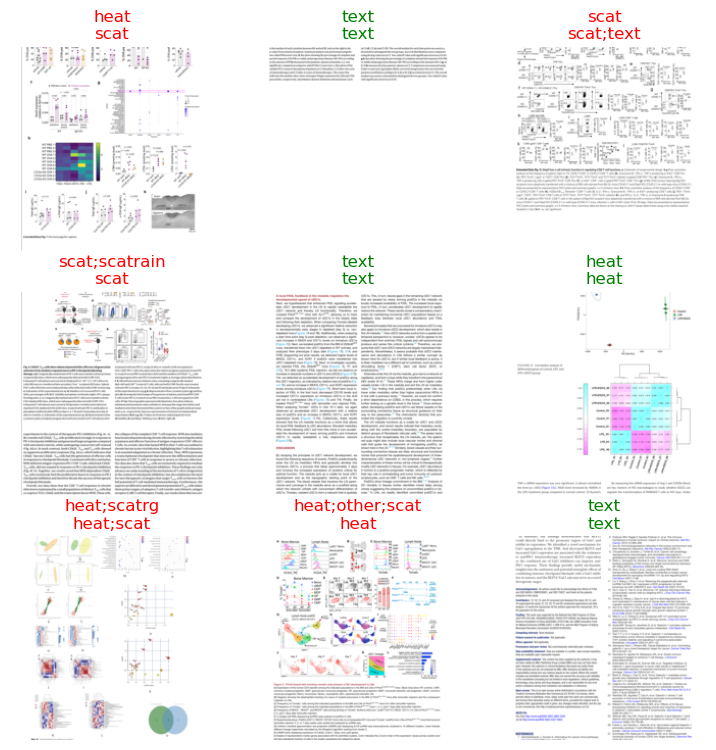

In [13]:
learn.show_results()

In [17]:
learn.predict(files[25]) # pick a specific image to predict


((#1) ['text'],
 tensor([False, False, False, False, False, False, False, False, False, False,
         False, False,  True]),
 tensor([9.0623e-14, 1.0765e-12, 2.5046e-07, 3.2739e-22, 3.1288e-36, 4.6691e-17,
         0.0000e+00, 6.0562e-28, 5.8069e-14, 5.3791e-13, 9.4190e-27, 1.5363e-22,
         1.0000e+00]))

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(15)